1. Exit
2. Print WordCloud
3. Enter the 'number' of words (most frequent ones are picked)
4. Enter the 'word' to calculate it's probability to be seen in the text


Pick an option:  2


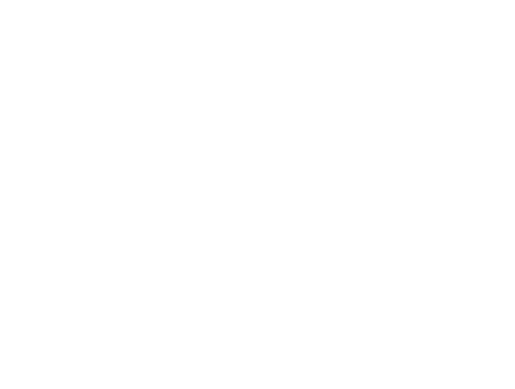

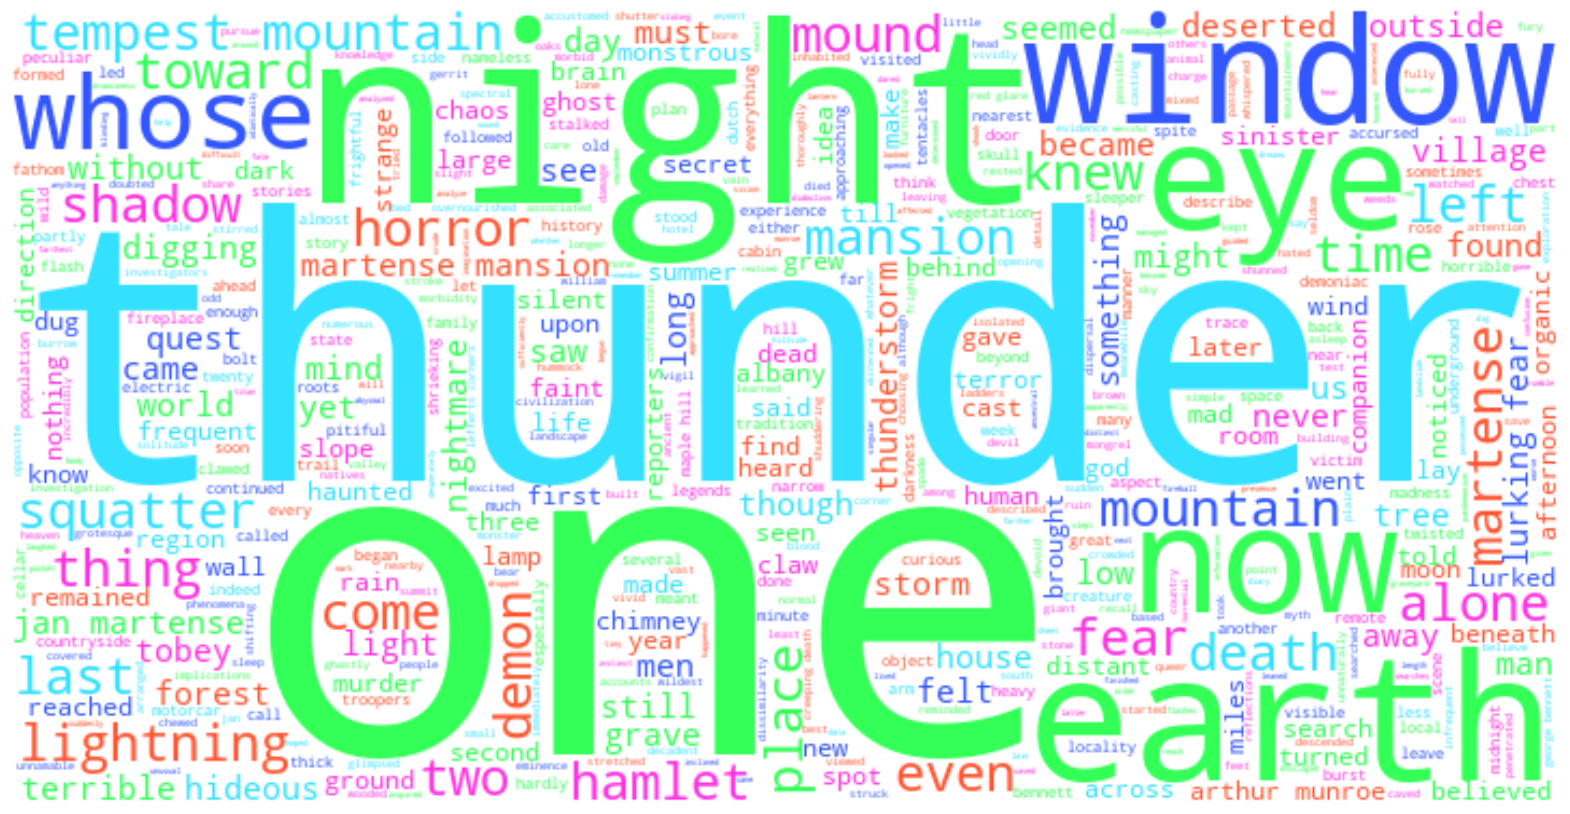


1. Exit
2. Print WordCloud
3. Enter the 'number' of words (most frequent ones are picked)
4. Enter the 'word' to calculate it's probability to be seen in the text


Pick an option:  1


BYE


In [5]:
# --------------------------IMPORTING PACKAGES------------------------------------------

#PDF to Text Conversion
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#Text Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

#WordCloud
from os import path
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator
import random

#-----------------------------------------------------------------------------------

#----------------------EXTRACTING TEXT----------------------------------------------

def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function
text = extract_text_from_pdf(r'C:\Users\braunny\Downloads\the_lurking_fear.pdf') #changed path to the one I needed

#------------------------------------------------------------------------------------

#------------REMOVING NUMBERS--------------------------------------------------------

def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#------------------------------------------------------------------------------------

#--------------REMOVING PUNCTUATION--------------------------------------------------

from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#--------------------------------------------------------------------------------------

#--------------------------REMOVING SPECIAL CHARACTERS---------------------------------

def remove_u(text):
    text = text.replace('.','') #new line to manually remove period(s)
    text = text.replace('-','') #new line to remove hyphen(s)
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#----------------REMOVING EXTRA SPACES-------------------------------------------------

def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#-------------------------------------------------------------------------------------

#--------------------------TEXT TO LOWERCASE------------------------------------------

text = np.char.lower(text) #passing all text to lowercase
text = text.tolist()

#-------------------------------------------------------------------------------------

#--------------SETTING MASK IMAGE-----------------------------------------------------

mask = np.array(Image.open(r'C:\Users\braunny\Downloads\econ.webp')) #change image dir
#plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#-----------COUNTING WORDS------------------------------------------------------------

#creates a dict with the frequency of each word an sort it
def create_freq_dict(text):
    freq_dict = {}
    words = text.split()
    for word in words:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
    return freq_dict

#count the total amount of words on the text
def count_total_words(freq_dict):
    n_total_words = 0
    for word,number in freq_dict.items():
        n_total_words += number
    return n_total_words

#calculates the probability to see certain word
def prob_of_spec_word(spec_word):
    small_n = 0
    big_n = count_total_words(freq_dict)
    if spec_word in freq_dict:
        small_n = freq_dict[spec_word]
    return small_n / big_n

#executing function
freq_dict = create_freq_dict(text) # this is global because its more comfortable to use this way

#-------------------------------------------------------------------------------------

#---------------USER DESIRED TEXT-----------------------------------------------------

#chopping the dict to obtain the amount of words the user wants to visualize
def print_user_selected_number_of_words(number_of_words):
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True) #sort the dict and returns a list of tuples
    user_top_n_words = sorted_words[:number_of_words] #crop and leaves only the first n words
    print(user_top_n_words) 

#-------------------------------------------------------------------------------------

#-----------CREATING WORDCLOUD---------------------------------------------------------

# ref: https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html
def color_func(word, font_size, position, orientation, random_state=None, **kwargs): 
    #list of colors
    colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33E1", "#33E1FF"]
    #return random val from list
    return random.choice(colors)

def create_final_wordcloud():
    wordcloud = WordCloud(mask=mask, width=2000, height=1000, contour_color="black", max_words=10000, relative_scaling=0, background_color="white").generate(text)
    image_colors = ImageColorGenerator(mask) #this line could be deleted, we are not using the mask for the colors 
    plt.figure(figsize=[20, 15])
    plt.imshow(wordcloud.recolor(color_func=color_func, random_state=3), interpolation="bilinear")
    plt.axis("off")
    _ = plt.show()

#--------------------------------------------------------------------------------------

#------------MAIN/INTERFACE------------------------------------------------------------

def print_menu():
    print("1. Exit")
    print("2. Print WordCloud")
    print("3. Enter the 'number' of words (most frequent ones are picked)")
    print("4. Enter the 'word' to calculate it's probability to be seen in the text")

def main():
    while True:
        print_menu()
        option = input("Pick an option: ")

        if option == '1':
            print("BYE")
            break
        elif option == '2':
            create_final_wordcloud()
            print()
        elif option == '3':
            try:
                number = int(input("Enter a number greater than 0: "))
                if number <= 0:
                    raise ValueError("Number must be greater than 0.")
                print_user_selected_number_of_words(number)
                print()
            except ValueError:
                print("Invalid input. Please enter a valid number.")
        elif option == '4':
            picked_word = input("Enter a word: ")
            print("It's probability to be seen is: " + str(prob_of_spec_word(picked_word)))
            print()
        else:
            print("Invalid option.")
            print()
main()

#--------------------------------------------------------------------------------------